Инициализация

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns
import sklearn
import math

from IPython.core.display import display, HTML
display(HTML("<style>.output.output_scroll { height:auto !important; box-shadow: none !important; }</style>"))

Загружаем данные:

In [2]:
dataset_urls = {
    "60s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-60s.csv",
    "70s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-70s.csv",
    "80s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-80s.csv",
    "90s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-90s.csv",
    "00s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-00s.csv",
    "10s" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-10s.csv",
    "all" : "https://raw.githubusercontent.com/AUXLander/MachineLearning/master/datasets/dataset-of-all.csv"
};

Выберем год

In [3]:
dataurl = dataset_urls["all"];
dataraw = pd.read_csv(dataurl);

Размеры таблицы:

In [4]:
dataraw.shape

(41106, 19)

Отобразим первые строки:

In [5]:
dataraw.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


Признаки:
* Track - название композиции
* Artist - исполнитель
* Uri - ссылка на композицию в Spotify
* Danceability - численная оценка от 0 до 1 описывает, насколько композияция подходит для танцев.
* Energy - численная оценка, которая описывает общую эмоциональную активность и энергичность музыкальной композиции. 
* Key - величина, которая описывает общую тональность музыкальной композиции, где 0 = Ля, 1 = Ля минор, 2 = Си бемоль и т.д., иначе, если тональность не определена = -1.
* Loudness - величина, описывающая громкость музыкальной копозиции в dB.
* Mode - признак, который определяет модальность: мажор - 1, а минор - 0.
* Speechiness - численная оценка от 0 до 1, которая описывает преобладание речи в музыкальной композиции. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Значения от 0,33 до 0,66 описывают дорожки, которые могут содержать как музыку, так и речь, как по частям, так и по слоям, включая такие случаи, как рэп. Значения ниже 0,33, скорее всего, представляют музыку и другие треки, не похожие на речь.
* Acousticness - численная оценка от 0 до 1, которая описывает вероятность чисто аккустического исполнения музыкальной композиции.
* Instrumentalness - численная оценка от 0 до 1, которая описывает вероятность отсутствия вокала в данной композиции. Чем выше оценка, тем ниже вероятность наличия вокала.
* Liveness - численная оценка от 0 до 1, которая описывает вероятность записи музыкальной композиции вживую. Оценка выше 0.8 означает высокую вероятность исполнения вживую.
* Valence - численное оценка от 0 до 1, которая описывает общий положительный эмоциональный настрой композиции от наиболее негативных и грустных - 0, к наиболее счастливым и радостным - 1.
* Tempo - величина, описывающая темп музыкальной композиции, количество ударов в минуту (BPM).
* Duration - величина, описывающая продолжительность музыкальной композиции в миллисекундах.
* Time signature - величина, описывающая количество ударов в каждом такте.
* Chorus hit - временная отметка, когда начинается третья секция музыкальной композиции (?)
* Sections - величина, описывающая количество секций в музыкальной композиции (?). 
* Target - признак, который принимает значение "1", если музыкальная композиция стала хитом, и "0" иначе.

Имена признаков в датасете:

In [6]:
dataraw.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

Признаки с неограниченным множеством принимаемых значений:

In [7]:
signs = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'];

Признаки с ограниченным множеством принимаемых значений:

In [8]:
enumerated = ['key', 'mode', 'time_signature'];

Покажем их преобладание:

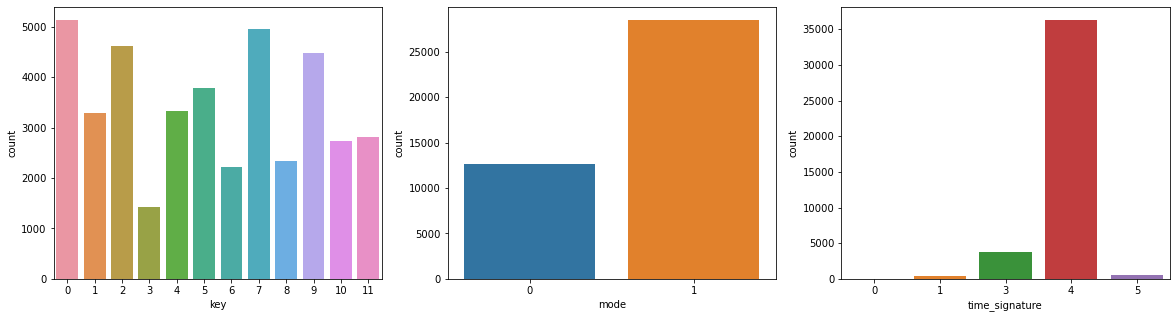

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

index = 0

for sign in enumerated:
    sns.countplot(x=sign, data = dataraw, ax=ax[index])
    index = index + 1

На полученных графиках выделяется признак time_signature, который принимает значения 0, 1 и 5 очень малое количество раз:

In [10]:
for time_signature in range(0,5):
    print(np.sum(dataraw['time_signature'] == time_signature))

3
371
0
3840
36297


Признаки с малым количеством вхождений (< 50) можно отбросить:

In [11]:
for time_signature in range(0,5):
    if(np.sum(dataraw['time_signature'] == time_signature) < 50):
        dataraw = dataraw[dataraw['time_signature'] != time_signature]
        
for time_signature in range(0,5):
    print(np.sum(dataraw['time_signature'] == time_signature))

0
371
0
3840
36297


Выберем композиции, которые стали хитами и наоборот:

In [12]:
hitlist = dataraw[dataraw['target'] == 1]
nohitlist = dataraw[dataraw['target'] == 0]

hitlist.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.3680,0.0,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.0185,0.0,0.1480,0.688,92.988,242587,4,41.51106,10,1
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.3630,0.0,0.1250,0.631,112.098,193760,4,22.62384,10,1
7,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.2200,0.0,0.1930,0.746,124.711,239240,4,35.59732,10,1
8,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.0538,0.0,0.0759,0.389,153.105,253640,4,19.65701,11,1


Таблица корреляции признаков:

In [13]:
datacorr = dataraw.corr()
datacorr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.206139,0.015554,0.274179,-0.032801,0.156455,-0.261254,-0.302004,-0.115241,0.553728,-0.067004,-0.063100,0.190761,-0.036005,-0.058723,0.346165
energy,0.206139,1.000000,0.022597,0.772648,-0.033794,0.122393,-0.715048,-0.208169,0.157794,0.341415,0.224004,0.011814,0.196249,0.009463,-0.040254,0.177154
key,0.015554,0.022597,1.000000,0.008485,-0.140427,0.026551,-0.024257,-0.013090,0.000643,0.007841,0.001304,0.015513,0.005239,0.010302,0.006813,0.009868
loudness,0.274179,0.772648,0.008485,1.000000,0.000598,0.069247,-0.566555,-0.374328,0.086649,0.271713,0.169489,-0.049914,0.165302,-0.013336,-0.080099,0.285976
mode,-0.032801,-0.033794,-0.140427,0.000598,1.000000,-0.059675,0.049998,-0.076020,0.008943,0.035626,0.026951,-0.074841,-0.009552,-0.022715,-0.057111,0.079689
speechiness,0.156455,0.122393,0.026551,0.069247,-0.059675,1.000000,-0.083902,-0.084103,0.131516,0.001500,0.036795,0.007622,0.021022,0.012885,-0.008646,-0.040810
acousticness,-0.261254,-0.715048,-0.024257,-0.566555,0.049998,-0.083902,1.000000,0.204157,-0.030784,-0.195281,-0.179635,-0.070257,-0.188286,-0.012256,-0.016803,-0.246072
instrumentalness,-0.302004,-0.208169,-0.013090,-0.374328,-0.076020,-0.084103,0.204157,1.000000,-0.050564,-0.287094,-0.053672,0.106548,-0.078250,0.048649,0.081184,-0.407633
liveness,-0.115241,0.157794,0.000643,0.086649,0.008943,0.131516,-0.030784,-0.050564,1.000000,0.000793,0.024947,0.005343,0.004805,0.038067,-0.011733,-0.051499
valence,0.553728,0.341415,0.007841,0.271713,0.035626,0.001500,-0.195281,-0.287094,0.000793,1.000000,0.107627,-0.172233,0.154901,-0.058942,-0.133618,0.251149


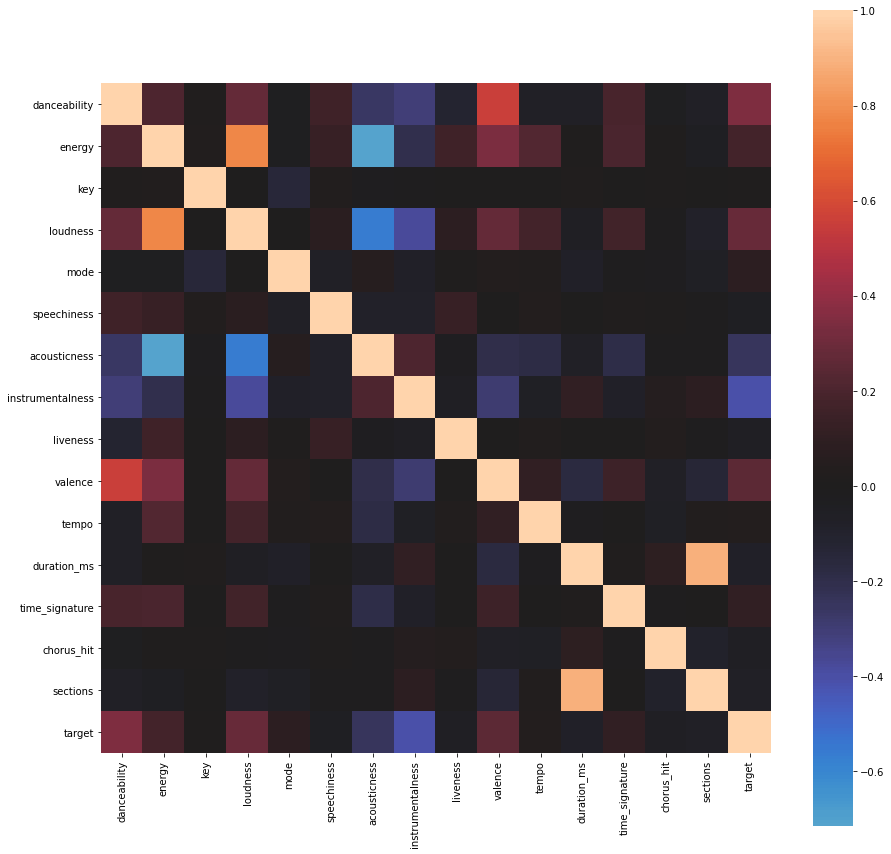

In [14]:
f, ax = plt.subplots(figsize=(15, 15))

ax = sns.heatmap(datacorr, center=0, square=True)
pass

Выделим наибольшую корреляцию c target среди остальных признаков:

In [15]:
epsilon = 0.2

datacorr_tmp = datacorr[abs(datacorr) > epsilon]['target'].sort_values(key=lambda x: abs(x))

index = 0
datacorr_max = []
datacorr_sgn = []
for sign in signs:
    if (math.isnan(datacorr_tmp[sign]) == 0):
        datacorr_sgn.append(sign)
        datacorr_max.append(datacorr_tmp[sign])

pd.DataFrame(datacorr_max, datacorr_sgn, ['Корреляция с target'])

,Корреляция с target
danceability,0.346165
loudness,0.285976
acousticness,-0.246072
instrumentalness,-0.407633
valence,0.251149


Из полученной таблицы можно увидеть отрицательную корреляцию признаков. Чем ближе значение корреляции музыкальной композиции к -1, тем выше вероятность провала музыкальной композиции.

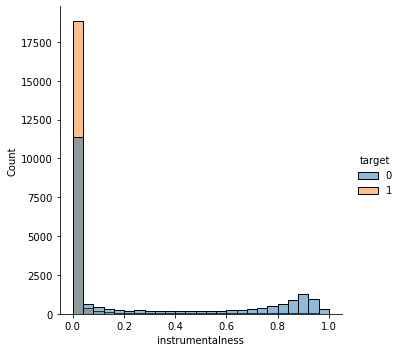

In [16]:
sns.displot(dataraw, x='instrumentalness', bins=25, hue='target')
pass

Выведем гистаграммы признаков хитов:

In [17]:
# for sign in signs:
#     data = hitlist.copy();
#     data[sign].hist()
#     plt.xlabel(sign)
#     plt.ylabel("count")
#     plt.show()
    

Выведем ящик с усами признаков хитов:

In [18]:
# for sign in signs:
#     data = hitlist.copy();
#     data.boxplot(column=sign)
#     plt.ylabel(sign)
#     plt.show()
    

Обычно, что ниже 1 и выше 3 квартиля считается выбросами, поэтому попробуем избавиться от них:

In [19]:
# rows_to_drop = hitlist[
#     (hitlist['duration_ms'] < hitlist['duration_ms'].quantile(0.005)) |
#     (hitlist['duration_ms'] > hitlist['duration_ms'].quantile(0.955)) | 
#     (hitlist['tempo'] > hitlist['tempo'].quantile(0.955)) |
#     (hitlist['danceability'] < hitlist['danceability'].quantile(0.005)) |
#     (hitlist['energy'] < hitlist['energy'].quantile(0.005))

# ].index

# cropped_hitlist = hitlist.drop(rows_to_drop)

In [20]:
# for sign in signs:
#     data = cropped_hitlist.copy();
#     data.boxplot(column=sign)
#     plt.ylabel(sign)
#     plt.show()